## Network Architecture

![Network](architecture.png)

-----

## Theory

- Probability of RankNet's problem
$$ P_{ij} = P(x_j > x_i) $$

- Output Node's result
$$ o_{ij} = f(x_i) - f(x_j)$$

- re-define probability of output node
$$ \overline{P_{ij}} = {\frac{e^{o_{ij}}}{1 + e^{o_{ij}}}} $$

- cost function
$$ C_{ij} = -\overline{P_{ij}}log(P_{ij}) - (1-\overline{P_{ij}}log(1-P_{ij})) $$

-----

## Implementation

In [2]:
import numpy as np

import keras
from keras import backend
from keras.layers import Activation, Dense, Input, Subtract
from keras.models import Model, Sequential

In [3]:
def base_network(input_dim):
    model = Sequential()
    model.add(Dense(input_dim, input_shape=(input_dim,), activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    return model

In [4]:
input_dim = 200
n = 100

# define input
pre_pair_input = Input(shape=(input_dim,))
post_pair_input = Input(shape=(input_dim,))

# get pair network
base_model = base_network(input_dim=input_dim)
rel_score = base_model(pre_pair_input)
irr_score = base_model(post_pair_input)

# subtract each score
diff = Subtract()([rel_score, irr_score])

# activate sigmoid function
prob = Activation("sigmoid")(diff)

# build
model = Model(inputs=[pre_pair_input, post_pair_input], outputs=prob)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

# data : a is always higher than b
doc_a_feature = np.random.uniform(size=(n, input_dim)) + 1
doc_b_feature = np.random.uniform(size=(n, input_dim))
y = np.ones((n, 1))

# train
history = model.fit([doc_a_feature, doc_b_feature], y, epochs=10, batch_size=100, validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 80 samples, validate on 20 samples
Epoch 1/10
80/80 [==============================] - 0s 2ms/step - loss: 0.9398 - accuracy: 0.0125 - val_loss: 0.3847 - val_accuracy: 1.0000
Epoch 2/10
80/80 [==============================] - 0s 84us/step - loss: 0.3763 - accuracy: 1.0000 - val_loss: 0.2081 - val_accuracy: 1.0000
Epoch 3/10
80/80 [==============================] - 0s 54us/step - loss: 0.1981 - accuracy: 1.0000 - val_loss: 0.1079 - val_accuracy: 1.0000
Epoch 4/10
80/80 [==============================] - 0s 73us/step - loss: 0.1017 - accuracy: 1.0000 - val_loss: 0.0601 - val_accuracy: 1.0000
Epoch 5/10
80/80 [==============================] - 0s 53us/step - loss: 0.0560 - accuracy: 1.0000 - val_loss: 0.0316 - val_accuracy: 1.0000
Epoch 6/10
80/80 [==============================] - 0s 49us/step - loss: 0.0296 - accuracy: 1.0000 - val_loss: 0.0165 - val_accuracy: 1.0000
Epoch 7/10
80/80

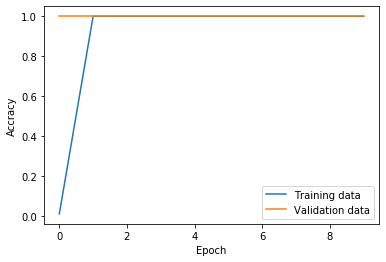

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

# visualize model acc
history = history.history
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.ylabel('Accracy')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc=0)
plt.show()